## Implementation and Visualization of Different Regression Methods

Using the ames housing dataset from kaggle

In [3]:
# import implemented regression baselines
from code.models import RidgeRegression

config = {"path": "data",
          "seed": 42,
          "n_folds": 10,
          "cv_metric": "root_mean_squared_log_error",
         }

model = RidgeRegression(config, alpha=0.1)
model.cross_validate()

Loading Data ...
Data successfully loaded.
Commencing 10-fold cross-validation ...
Cross Validation Concluded. Avg CV score: 
  8.440128352684614e-15 std:  1.3731228577572757e-15
Margin of standard variation: 16.268980759285686 %


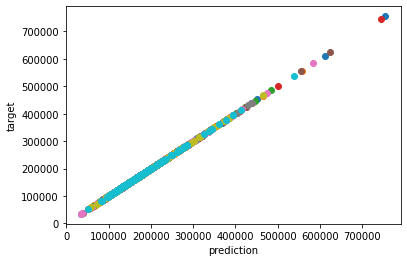

In [7]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.scatter(model.m_cv_predictions[i], model.m_cv_targets[i])
    plt.xlabel("prediction")
    plt.ylabel("target")
plt.show()